In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ripple_detection import Karlsson_ripple_detector, Kay_ripple_detector

# Load LFP data

In [3]:
# #------------------------------------------------------------------------------
# # load data from S1 data file 
# #------------------------------------------------------------------------------
import pickle
from matplotlib import pyplot as plt
import os
import IPython as ipy
import pickle as pkl
import scipy.signal as ss
import scipy.io as sio
import numpy as np
import mat73

from scipy.signal import butter, lfilter
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

In [4]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def notch_filter(samp_freq,notch_freq,quality_factor,time,x):
    # Set time vector
    n = time
    noisySignal = x    
    b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
    freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)    
    # Apply notch filter to the noisy signal using signal.filtfilt
    outputSignal = signal.filtfilt(b_notch, a_notch, noisySignal)    
    return outputSignal

def load_LFP_LEC(mat_fnumber,tinitial,tfinal,fs):
    
    ## Load human LEC downsampled data
    with open('/home/fernando/Documents/human_epilepsy_data/487/487_044_LEC'+str(mat_fnumber)+'_downsampled.pkl', 'rb') as fileObj: LECData = pickle.load(fileObj)
        
    V = list(LECData['V'])
    time = np.linspace(0, np.size(V)/fs, np.size(V))    
    
    print('487_044_LEC'+str(mat_fnumber)+'.mat','size(V) =',np.size(V))
    
    x = []
    tx = []
    for i,t in enumerate(time):  
        if t>tinitial and t<=tfinal:
            x.append(V[i])
            tx.append(t-tinitial)
            
    return tx, x , np.size(V)

In [5]:
fs = 32556/16
factordecimate = 16
tinitial = 0.0
tfinal = 56817449/fs

fs = 2034.75    

for mat_fnumber in range(7,8):
    
    ## Load human LEC downsampled data
    with open('/home/fernando/Documents/human_epilepsy_data/487/487_044_LEC'+str(mat_fnumber)+'_downsampled.pkl', 'rb') as fileObj: LECData = pickle.load(fileObj)
        
    V = list(LECData['V'])
    time = np.linspace(0, np.size(V)/fs, np.size(V))

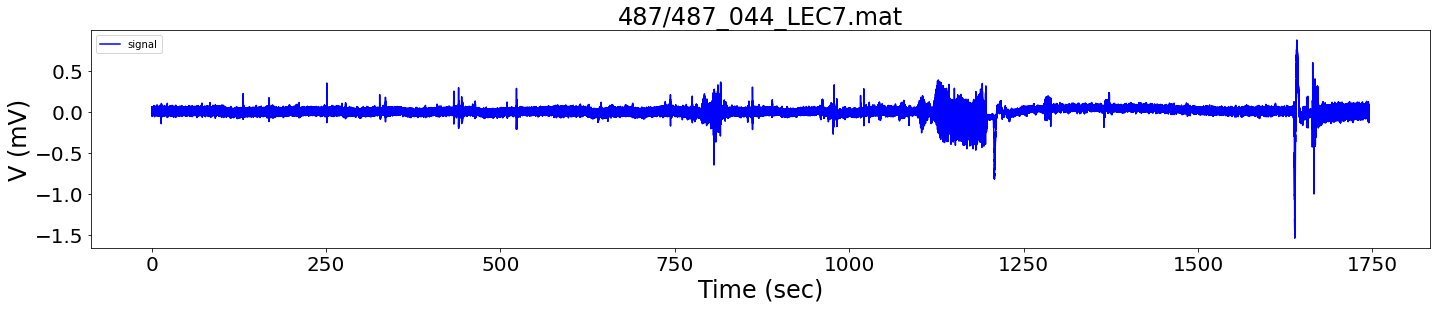

In [6]:
plt.figure(figsize=(24,4)) 

mat_fname = '487/487_044_LEC'+str(mat_fnumber)+'.mat'
plt.title(mat_fname, fontsize=24)

plt.plot(time, V, 'b-', linewidth=1.5, label='signal')
plt.xlabel('time (seconds)')
plt.axis('tight')
plt.ylabel('V (mV)', fontsize=24)
# plt.xlim(0,tfinal-tinitial)
plt.xlabel('Time (sec)', fontsize=24)
# plt.xlim(802.8,802.81)
# plt.ylim(-.01, .3)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# plt.grid(True)
plt.legend(loc='upper left')

plt.show()


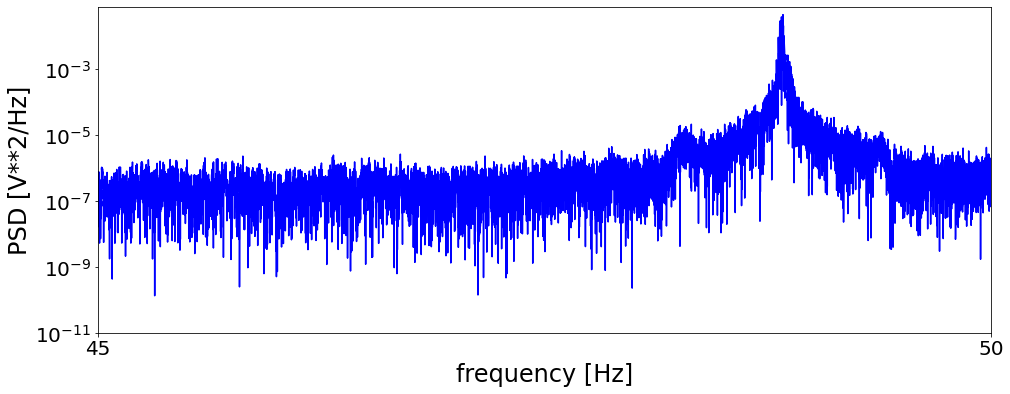

In [7]:
plt.figure(figsize=(16,6))
fontSize = 12

f, Pxx_den = ss.periodogram(V, fs)
plt.semilogy(f, Pxx_den,'b')


plt.ylim([1e-11, 8e-2])
plt.xlim([45.1, 50])
plt.xlabel('frequency [Hz]', fontsize=24)
plt.ylabel('PSD [V**2/Hz]', fontsize=24)
plt.yticks(fontsize = 20)
# plt.xticks([1,100,200, 300,400,800], fontsize=20);
plt.xticks([45,50], fontsize=20);

In [8]:
tinitial = 1000.0
tfinal = 1200.0
fs = 32556/16

# fs = 56817449/1800
lowcut = 100.0
highcut = 600.0

lfps = []

for mat_fnumber in range(1,8):
    time, x, sizeV = load_LFP_LEC(mat_fnumber,tinitial,tfinal,fs)
    
    # Create/view notch filter
    samp_freq = fs # Sample frequency (Hz)
    notch_freq = 49.0 # Frequency to be removed from signal (Hz)
    quality_factor = 20.0 # Quality factor

    outputSignal = notch_filter(samp_freq,notch_freq,quality_factor,time,x)
    
    y2 = butter_bandpass_filter(outputSignal, lowcut, highcut, fs, order=5)
    
    lfps.append(y2)

487_044_LEC1.mat size(V) = 3551091
487_044_LEC2.mat size(V) = 3551091
487_044_LEC3.mat size(V) = 3551091
487_044_LEC4.mat size(V) = 3551091
487_044_LEC5.mat size(V) = 3551091
487_044_LEC6.mat size(V) = 3551091
487_044_LEC7.mat size(V) = 3551091


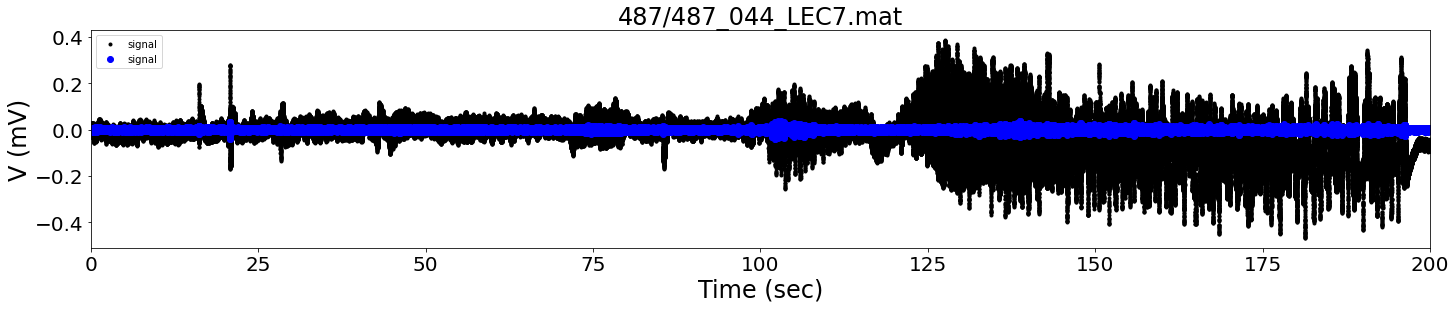

In [9]:
plt.figure(figsize=(24,4)) 

mat_fname = '487/487_044_LEC'+str(mat_fnumber)+'.mat'
plt.title(mat_fname, fontsize=24)

plt.plot(time, x, 'k.', linewidth=1.5, label='signal')
plt.plot(time,y2, 'bo', label='signal')
plt.xlabel('time (seconds)')
plt.axis('tight')
plt.ylabel('V (mV)', fontsize=24)
plt.xlim(0,tfinal-tinitial)
plt.xlabel('Time (sec)', fontsize=24)
# plt.xlim(22.8,23.0)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# plt.grid(True)
plt.legend(loc='upper left')

plt.show()


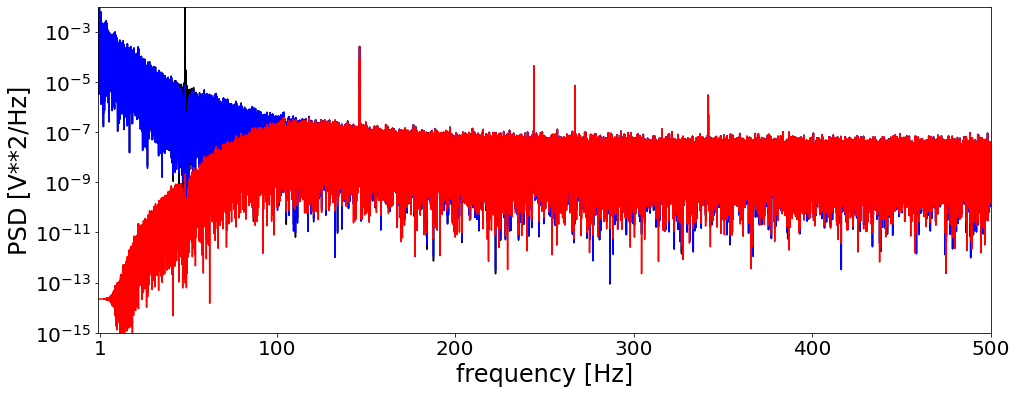

In [10]:
plt.figure(figsize=(16,6))
fontSize = 12

f, Pxx_den = ss.periodogram(x, fs)
plt.semilogy(f, Pxx_den,'k')

f, Pxx_den = ss.periodogram(outputSignal, fs)
plt.semilogy(f, Pxx_den,'b')

f, Pxx_den = ss.periodogram(y2, fs)
plt.semilogy(f, Pxx_den,'r')

plt.ylim([1e-15, 1e-2])
plt.xlim([0.1, 500])
plt.xlabel('frequency [Hz]', fontsize=24)
plt.ylabel('PSD [V**2/Hz]', fontsize=24)
plt.yticks(fontsize = 20)
plt.xticks([1,100,200, 300,400,500], fontsize=20);

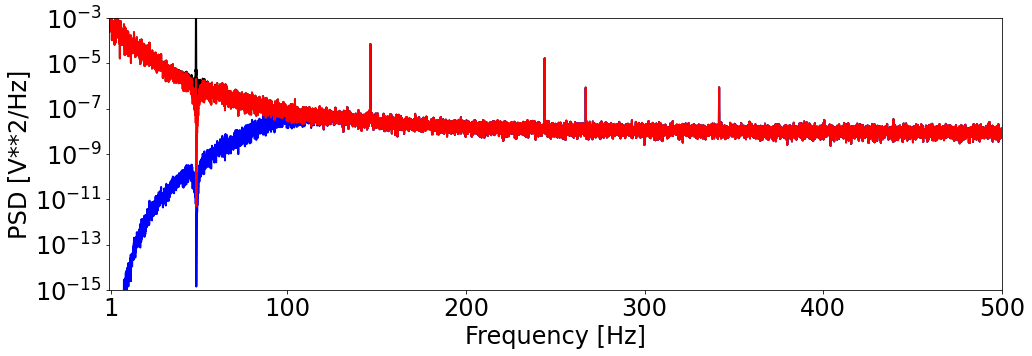

In [11]:
plt.figure(figsize=(16,5))
fontSize = 24
lw = 2

f, Pxx_den = ss.welch(x, fs, nperseg=64*1024)
plt.semilogy(f, Pxx_den,'k', linewidth=2)

f, Pxx_den = ss.welch(y2, fs, nperseg=64*1024)
plt.semilogy(f, Pxx_den,'b', linewidth=2)

f, Pxx_den = ss.welch(outputSignal, fs, nperseg=64*1024)
plt.semilogy(f, Pxx_den,'r', linewidth=2)

plt.ylim(1e-15, 1e-3)
plt.xlim(0.1, 500)
plt.xlabel('Frequency [Hz]', fontsize = fontSize)
plt.ylabel('PSD [V**2/Hz]', fontsize = fontSize)
plt.xticks([1,100,200, 300,400,500],fontsize = fontSize)
plt.yticks(fontsize = fontSize)

plt.show()

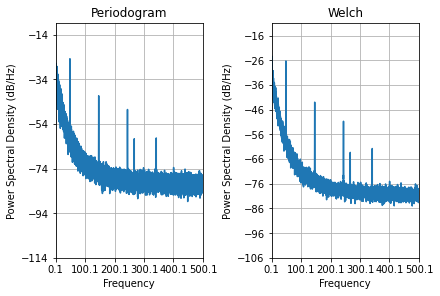

In [12]:
import matplotlib.mlab as mlab

fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
xticks = np.arange(0.1, 502, 100)
xrange = (xticks[0], xticks[-1])

ax0.psd(x, NFFT=60001, Fs=fs, window=mlab.window_none,
        scale_by_freq=True)
ax0.set_title('Periodogram')
ax0.set_xticks(xticks)
ax0.set_xlim(xrange)

ax1.psd(x, NFFT=30000, Fs=fs, window=mlab.window_none, noverlap=750,
        scale_by_freq=True)
ax1.set_title('Welch')
ax1.set_xticks(xticks)
ax1.set_xlim(xrange)

plt.show()

## Many LFPs, only two LFPs with ripples

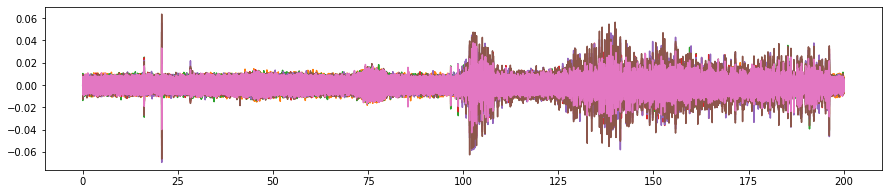

In [13]:
lfps2 = np.stack(
    (
        lfps[0],
        lfps[1],
        lfps[2],
        lfps[3],
        lfps[4],
        lfps[5],
        lfps[6],
#         lfps[7],
    ),
    axis=1,
)

time = np.linspace(0, np.size(x)/fs, np.size(x))

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps2)
speed = np.ones_like(time)


In [14]:
from ripple_detection import filter_ripple_band

SAMPLING_FREQUENCY = fs

In [15]:
filtered_lfps = filter_ripple_band(lfps2)
Karlsson_ripple_times = Karlsson_ripple_detector(
    time, filtered_lfps, speed, SAMPLING_FREQUENCY
)

display(Karlsson_ripple_times)

,start_time,end_time
ripple_number,,
1,20.731345,20.775085
2,34.458863,34.540446
3,39.622655,39.713576
4,74.110515,75.542636
5,75.549516,75.708258
...,...,...
90,190.983637,191.075049
91,194.217949,194.263655
92,195.223972,195.301623


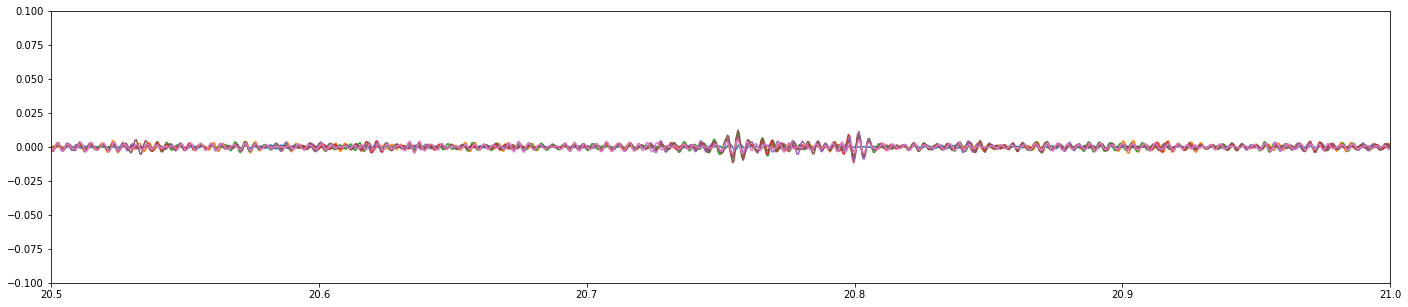

In [26]:
plt.figure(figsize=(24,5))
plt.plot(time, filtered_lfps)
# plt.xlim(96.71, 96.72);
plt.ylim(-0.025,0.025)
# plt.xlim(222.8,223.0)
plt.xlim(20.5,21.0)
plt.ylim(-0.1,0.1);

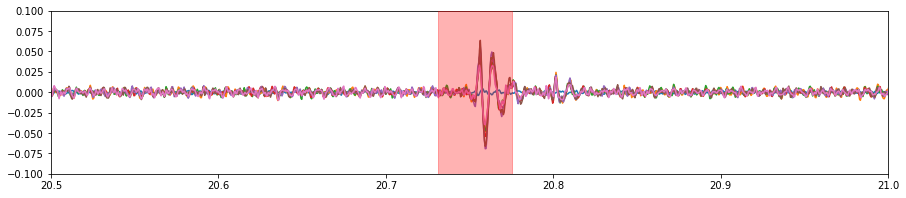

In [25]:
plt.figure(figsize=(15,3))
plt.plot(time, lfps2)
for ripple in Karlsson_ripple_times.itertuples():
    plt.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)

plt.xlim(20.5,21.0)
plt.ylim(-0.1,0.1);

,start_time,end_time
ripple_number,,
1,20.741174,20.811944
2,45.593428,45.668130
3,73.801877,75.143568
4,75.146517,76.358954
5,76.366817,77.717355
...,...,...
143,194.211560,194.335408
144,194.373251,194.428786
145,195.188586,195.304080


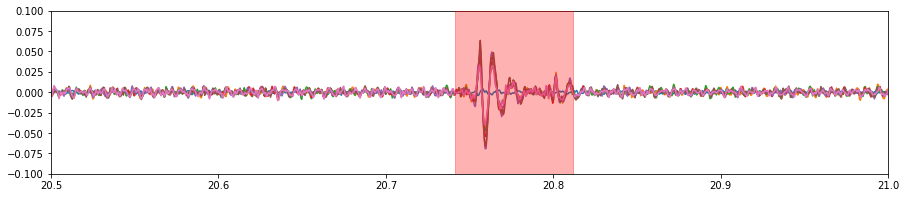

In [27]:
Kay_ripple_times = Kay_ripple_detector(time, filtered_lfps, speed, SAMPLING_FREQUENCY)

display(Kay_ripple_times)

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps2)
for ripple in Kay_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)

# plt.xlim(222.8,223.0)
plt.xlim(20.5,21.0)
plt.ylim(-0.1,0.1);

In [19]:
for ii in range(1,7):
    print(ii,Karlsson_ripple_times['end_time'][ii]-Karlsson_ripple_times['start_time'][ii])

1 0.04374012468392863
2 0.08158270446665483
3 0.09092048389356222
4 1.4321204868423365
5 0.1587422502574043
6 0.30568941071238953
